In [1]:
import pandas as pd
db_df = pd.read_csv('db_statistic_all_2022-10-08_mode_2.csv',index_col=0)
yolox_df = pd.read_csv('yolox_statistic_all_2022-10-08_mode_2.csv',index_col=0)

In [2]:
#写成类
def get_attribute(df:pd.DataFrame):
    app_names = df.columns.values#x
    app_names = [x[2:4] for x in app_names]
    det_icr = df.loc['detect_icon_recall',:].values#y1
    det_ter = df.loc['detect_text_recall',:].values

    cls_icr = df.loc['classification_icon_recall',:].values
    cls_ter = df.loc['classification_text_recall',:].values

    cls_icp = df.loc['classification_icon_precision',:].values
    cls_tep = df.loc['classification_text_precision',:].values
    return app_names,det_icr,det_ter, cls_icr, cls_ter, cls_icp, cls_tep


In [4]:
db_app_names,db_det_icr,db_det_ter, db_cls_icr, db_cls_ter, db_cls_icp, db_cls_tep = get_attribute(db_df)
yx_app_names,yx_det_icr,yx_det_ter, yx_cls_icr, yx_cls_ter,yx_cls_icp, yx_cls_tep = get_attribute(yolox_df)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def darw_line_table(x_ticks: list, y1: list, y2: list, label_name: list, title_name: str):
    # x轴刻度标签
    # x轴范围（0, 1, ..., len(x_ticks)-1）
    x = x_ticks
    # x = np.linspace(0, 2*len(x_ticks), 2)
    # 设置画布大小
    plt.figure(figsize=(10, 6))
    # 画第1条折线，参数看名字就懂，还可以自定义数据点样式等等。
    plt.plot(x, y1, color='#FF0000', label=label_name[0], linewidth=1.0, linestyle = '--', marker='*')
    # 画第2条折线
    plt.plot(x, y2, color='#00FF00', label=label_name[1], linewidth=1.0, marker='o')
    
    # 给第1条折线数据点加上数值，前两个参数是坐标，第三个是数值，ha和va分别是水平和垂直位置（数据点相对数值）。
    # for a, b in zip(x, y1):
    #     plt.text(a, b, '%d'%b, ha='center', va= 'bottom', fontsize=14)
    # # 给第2条折线数据点加上数值
    # for a, b in zip(x, y2):
    #     plt.text(a, b, '%d'%b, ha='center', va= 'bottom', fontsize=14)
    
    # 画水平横线，参数分别表示在y=1，x=0~len(x)-1处画直线。
    plt.hlines(0.97, 0, len(x)-1, colors = "#000000", linestyles = "-.", alpha = 0.2)
    # plt.hlines(0.9, 0, len(x)-1, colors = "#000000", linestyles = "-.", alpha = 0.2)
    # plt.hlines(0.85, 0, len(x)-1, colors = "#000000", linestyles = "-.", alpha = 0.2)
    # 添加x轴和y轴刻度标签
    # plt.xticks([r for r in x], x_ticks, fontsize=14, rotation=20)
    x_ticks = [ f'{x*0.01:.2f}' for x in x_ticks ]
    print(x_ticks)
    plt.xticks([r for r in x], x_ticks, fontsize=14, rotation=20)
    plt.yticks(fontsize=14)

    # 添加x轴和y轴标签
    plt.xlabel(u'app_names', fontsize=14)
    plt.ylabel(u'metric', fontsize=14)
    
    # 标题
    plt.title(title_name, fontsize=14)
    
    # 图例
    plt.legend(fontsize=14)
    
    # 保存图片
    plt.savefig(title_name+'.pdf', bbox_inches='tight')
    # 显示图片
    plt.show()

['0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50']


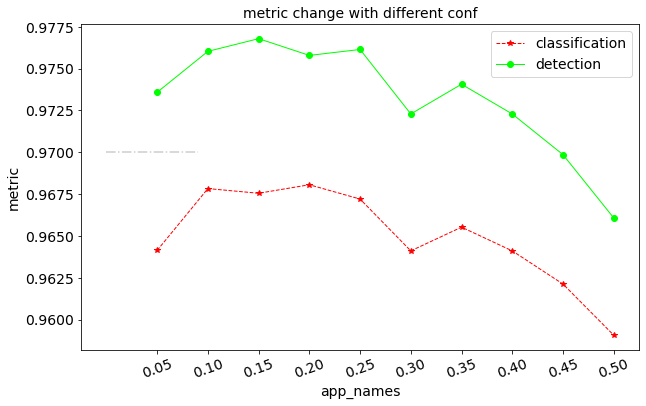

In [32]:
y1 = [0.964135793,0.967828471,0.967549093,0.968056269,0.967202625,0.964106263,0.965523203,0.964106263,0.962123649	,0.959068464]
y2 = [0.973582378,	0.976028488	,0.976786372,0.975785972,0.976140558,0.972287487,0.97406403	,0.972287487,	0.969855896	,0.966075097]

x_ticks = range(5,55,5)
darw_line_table(x_ticks, y1, y2, ['classification','detection'], 'metric change with different conf')

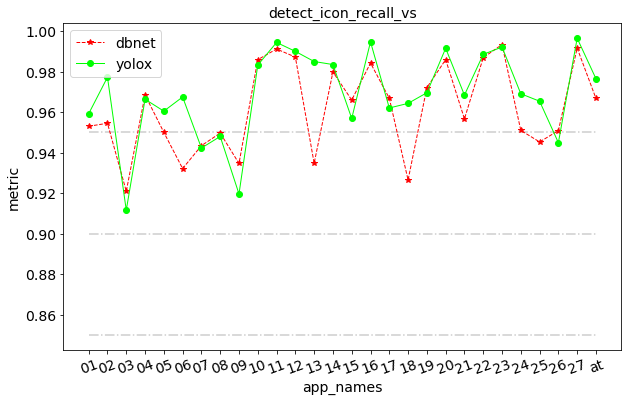

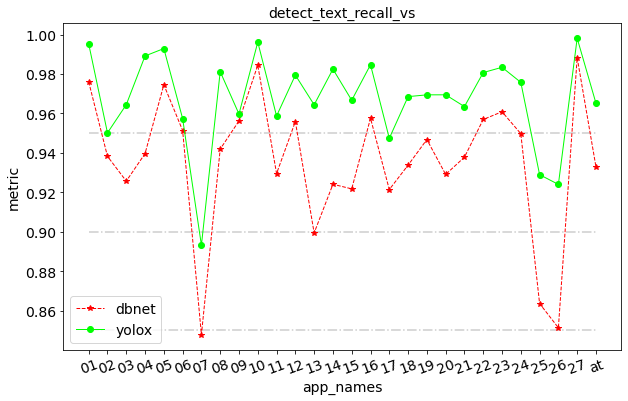

In [18]:
from json import detect_encoding

darw_line_table(db_app_names, db_det_icr, yx_det_icr,'detect_icon_recall_vs')
darw_line_table(db_app_names, db_det_ter, yx_det_ter,'detect_text_recall_vs')

In [ ]:
darw_line_table(db_app_names, db_cls_icp, yx_cls_icp,'cls_icon_pre_vs')
darw_line_table(db_app_names, db_cls_tep, yx_cls_tep,'cls_text_pre_vs')

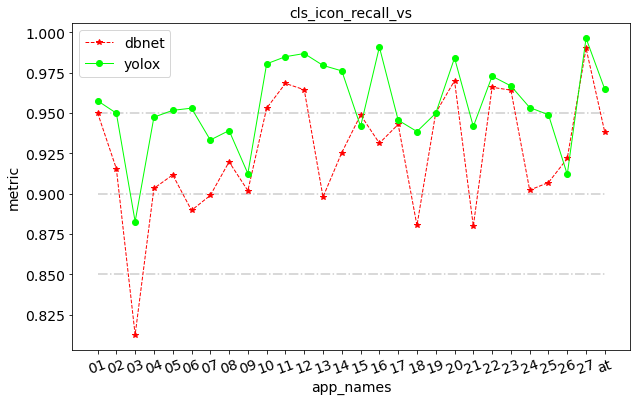

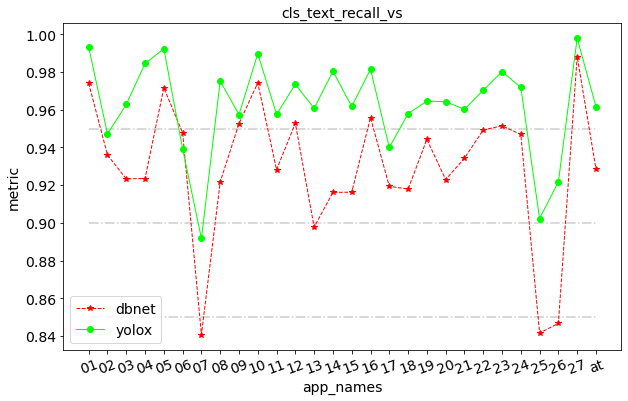

In [6]:
darw_line_table(db_app_names, db_cls_icr, yx_cls_icr,'cls_icon_recall_vs')
darw_line_table(db_app_names, db_cls_ter, yx_cls_ter,'cls_text_recall_vs')